# Task 2 - Dimensionality Reduction (27 points)

**Task Description:** Principal Component Analysis (PCA) is a dimensionality reduction method that is often used to reduce the dimensionality of datasets, by transforming a large set of variables into a smaller one, while preserving as much  variance  as  possible.  There  are  two  methods  for  performing  a  Principal  Component  Analysis:  using Eigenvector  Decomposition  (EIG)  and  the  more  generalized  Singular  Value  Decomposition  (SVD). 

**Input:** In this exercise, you will use the Wheat Seeds[1] dataset, which involves the prediction of species given measurements of seeds from different types of wheat. The dataset can be found as `seeds.csv` in the data folder. Do not forget to exclude the data that should not be considered for dimensionality reduction when you apply the algorithms on the dataset.

[1] https://archive.ics.uci.edu/ml/datasets/seeds

In [1]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# You may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

## 2.1 PCA Implementation (16 points)
### 2.1.1 Implement PCA from scratch* via SVD based on the lecture slides. Project the provided dataset onto the first two principal components. (10 points).
\* You may use any native Python package, numpy, and scalers from sklearn.

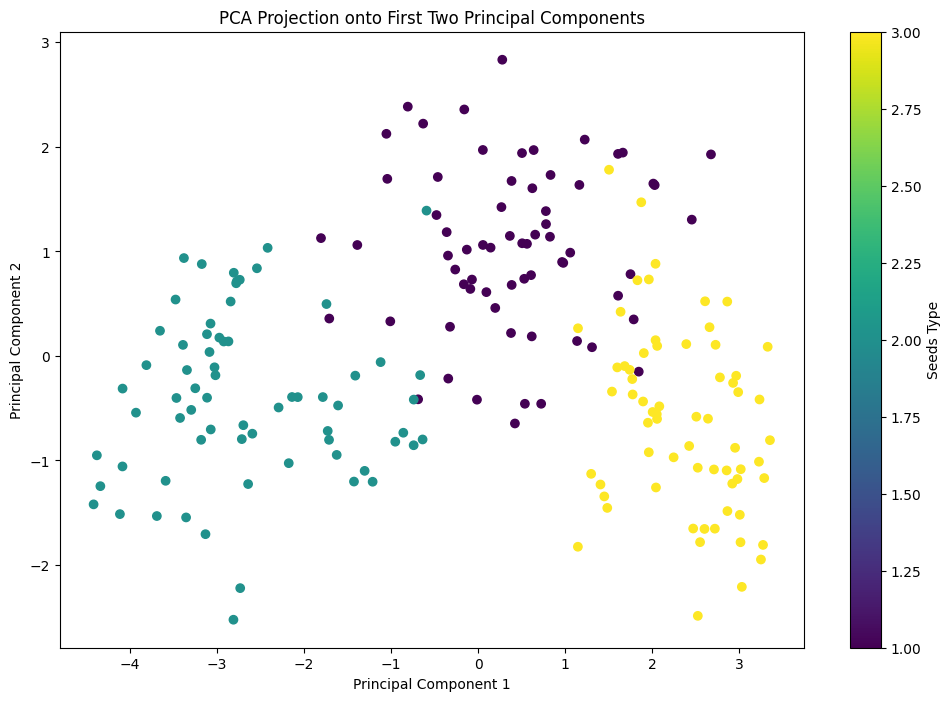

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data= pd.read_csv("./data/seeds.csv")

# Split features and labels
X=data.iloc[:, :-1].values #Features (without last column)
y=data.iloc[:, -1].values  #Labels

#Standardize features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#Perform SVD for PCA
U, S, Vt=np.linalg.svd(X_scaled)

#Project onto the first two principal components
PC1=X_scaled.dot(Vt.T[:, 0])  #first principal component
PC2=X_scaled.dot(Vt.T[:, 1])  #Second principal component
plt.figure(figsize=(12, 8))
plt.scatter(PC1,PC2,c=data['Type'], cmap='viridis')
plt.title('PCA Projection onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Seeds Type' )
plt.show()

# reference : https://excelsior-cjh.tistory.com/167 (This website is in Korean. I referenced the code in this article to find PCA using SVD.)

### 2.1.2 Compare your results with the PCA algorithm of sklearn. (6 points)
- Run sklearn's PCA on the provided dataset. Project the data onto the first two principal components. (3 points)
- Create scatter plots for the results (your implementation and sklearn's). Colour the points by their corresponding Type label. (3 points)

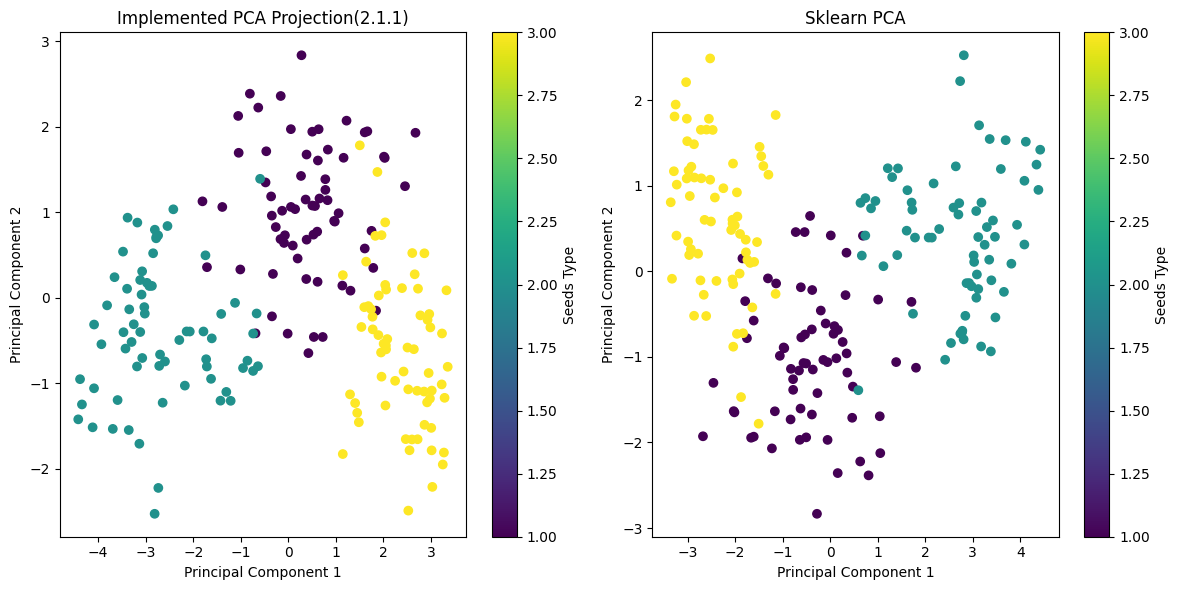

In [4]:
from sklearn.decomposition import PCA 

#Sklearn PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)


plt.figure(figsize=(12, 6))

#SVD-baed PCA (2.1.1)
plt.subplot(1, 2, 1)
plt.scatter(PC1,PC2,c=data['Type'], cmap='viridis')
plt.title('Implemented PCA Projection(2.1.1)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Seeds Type')

#sklearn PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0],X_pca[:, 1],c=data['Type'], cmap='viridis')
plt.title('Sklearn PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Seeds Type')

plt.tight_layout()
plt.show()

#reference : https://excelsior-cjh.tistory.com/167 (This website is in Korean. I referenced the code in this article about using Scikit-Learn for PCA)

## 2.2 Briefly explain the “curse of dimensionality” problem and the importance of PCA in it. (5 points)
Write the answer in your words but support it by citing at least 1 reference. (Do not use AI tools.)

The "curse of dimensionality" is a problem that arises when dealing with high-dimensional data. As the number of dimensions increases, the space becomes exponentially larger, and the data becomes sparsely distributed, making model training and deriving conclusions difficult. To increase accuracy, more data is required, which can lead to the problem of overfitting.

PCA helps solve this curse of dimensionality. PCA reduces high-dimensional data to a lower dimension while preserving the essential information, thereby simplifying the model. This helps prevent overfitting and is useful for visualizing and drawing conclusions.

reference : https://courses.cs.washington.edu/courses/cse416/22su/lectures/13/lecture_13.pdf

## 2.3 Non-Negative Matrix Factorization (6 points)

Apply NMF on the dataset. Create a scatter plot of the solutions. You can use the NMF implementation from sklearn.decomposition. Before using NMF on the dataset, scale it with an appropriate scaler from sklearn.preprocessing.

C:\Users\LG\anaconda3\envs\myenv\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


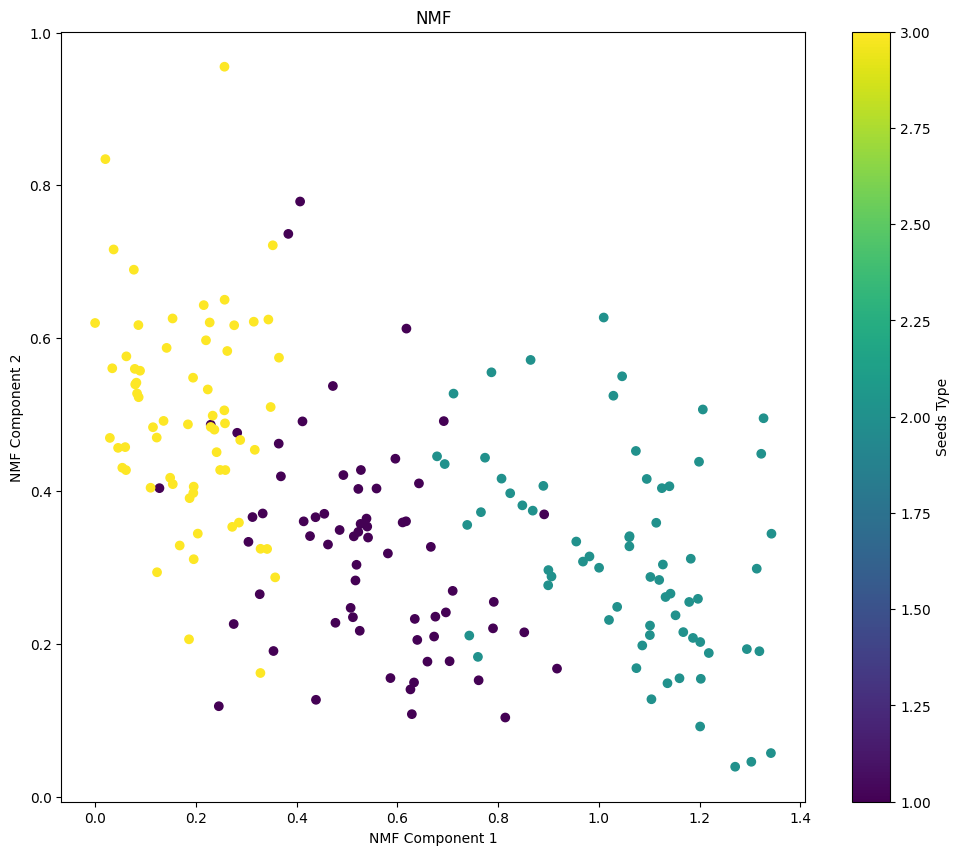

In [5]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#scale the data 
scaler= MinMaxScaler()
X_scaled= scaler.fit_transform(X)

#NMF (2 components)
nmf= NMF(n_components=2,init='random', random_state=42)
X_nmf= nmf.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(X_nmf[:, 0],X_nmf[:, 1],c=data['Type'], cmap='viridis')
plt.title('NMF')
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.colorbar(label='Seeds Type')
plt.show()